## 3. Modeling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
df = pd.read_csv('headline_sentiment.csv')
df

,stock,headline,source,date,time,cleaned_headline,neg,neu,pos,compound,sentiment_label
0,TSLA,"Polestar Upgrades Model, Hits EV Production Mi...",(Barrons.com),Aug-23-23,09:07AM,polestar upgrade model hit ev production miles...,0.167,0.833,0.0,-0.3818,Negative
1,TSLA,15 Highest Paying Countries for Engineers,(Insider Monkey),Aug-23-23,09:07AM,highest paying country engineer,0.000,1.000,0.0,0.0000,Neutral
2,TSLA,Tesla's German plant lowers production target ...,(Reuters),Aug-23-23,09:07AM,tesla german plant lower production target ami...,0.130,0.870,0.0,-0.1280,Negative
3,TSLA,"Down 9% in the Past 5 Days, Is Now the Right T...",(Motley Fool),Aug-23-23,09:07AM,past day right time buy bitcoin,0.000,1.000,0.0,0.0000,Neutral
4,TSLA,Tesla's German plant lowers production target ...,(Reuters),Aug-23-23,09:07AM,tesla german plant lower production target ami...,0.130,0.870,0.0,-0.1280,Negative
...,...,...,...,...,...,...,...,...,...,...,...
595,LCID,Lucid stock declines after missing on Q4 reven...,(Yahoo Finance Video),Feb-23-23,04:17PM,lucid stock decline missing q revenue estimate,0.216,0.784,0.0,-0.2960,Negative
596,LCID,EV Startups Have a New Bottleneck: Demand,(The Wall Street Journal),Feb-23-23,04:17PM,ev startup new bottleneck demand,0.231,0.769,0.0,-0.1280,Negative
597,LCID,EV Startup Lucid Aims to Nearly Double Product...,(The Wall Street Journal),Feb-22-23,09:14PM,ev startup lucid aim nearly double production,0.000,1.000,0.0,0.0000,Neutral
598,LCID,"Yahoo Finance Trending Tickers: Nvidia, Lucid,...",(Yahoo Finance),Feb-22-23,09:14PM,yahoo finance trending ticker nvidia lucid ets...,0.000,1.000,0.0,0.0000,Neutral


In [3]:
df['label'] = df['sentiment_label'].map({'Negative': -1, 'Neutral': 0, 'Positive': 1})
df

,stock,headline,source,date,time,cleaned_headline,neg,neu,pos,compound,sentiment_label,label
0,TSLA,"Polestar Upgrades Model, Hits EV Production Mi...",(Barrons.com),Aug-23-23,09:07AM,polestar upgrade model hit ev production miles...,0.167,0.833,0.0,-0.3818,Negative,-1
1,TSLA,15 Highest Paying Countries for Engineers,(Insider Monkey),Aug-23-23,09:07AM,highest paying country engineer,0.000,1.000,0.0,0.0000,Neutral,0
2,TSLA,Tesla's German plant lowers production target ...,(Reuters),Aug-23-23,09:07AM,tesla german plant lower production target ami...,0.130,0.870,0.0,-0.1280,Negative,-1
3,TSLA,"Down 9% in the Past 5 Days, Is Now the Right T...",(Motley Fool),Aug-23-23,09:07AM,past day right time buy bitcoin,0.000,1.000,0.0,0.0000,Neutral,0
4,TSLA,Tesla's German plant lowers production target ...,(Reuters),Aug-23-23,09:07AM,tesla german plant lower production target ami...,0.130,0.870,0.0,-0.1280,Negative,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
595,LCID,Lucid stock declines after missing on Q4 reven...,(Yahoo Finance Video),Feb-23-23,04:17PM,lucid stock decline missing q revenue estimate,0.216,0.784,0.0,-0.2960,Negative,-1
596,LCID,EV Startups Have a New Bottleneck: Demand,(The Wall Street Journal),Feb-23-23,04:17PM,ev startup new bottleneck demand,0.231,0.769,0.0,-0.1280,Negative,-1
597,LCID,EV Startup Lucid Aims to Nearly Double Product...,(The Wall Street Journal),Feb-22-23,09:14PM,ev startup lucid aim nearly double production,0.000,1.000,0.0,0.0000,Neutral,0
598,LCID,"Yahoo Finance Trending Tickers: Nvidia, Lucid,...",(Yahoo Finance),Feb-22-23,09:14PM,yahoo finance trending ticker nvidia lucid ets...,0.000,1.000,0.0,0.0000,Neutral,0


In [4]:
X = df['headline']
y = df['label']

In [5]:
y.value_counts(normalize=True)

 0    0.465000
 1    0.333333
-1    0.201667
Name: label, dtype: float64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                   test_size =0.3,
                                                   stratify=y,
                                                   random_state=42)

### Baseline model

In [7]:
y_test.value_counts(normalize=True)

 0    0.466667
 1    0.333333
-1    0.200000
Name: label, dtype: float64

### Naive Bayes model with CountVectorizer

In [8]:
print("Before pipeline:")
print("X_train shape:", X_train.shape)
print("X_train type:", type(X_train))

Before pipeline:
X_train shape: (420,)
X_train type: <class 'pandas.core.series.Series'>


In [9]:
pipe = Pipeline([
    ('count_vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

pipe_params = {
    'count_vectorizer__max_features': [2000, 3000, 4000, 5000],
    'count_vectorizer__min_df': [1, 2],
    'count_vectorizer__max_df': [0.7, 0.8],
    'count_vectorizer__ngram_range': [(1,1), (1,2)]
}

gs = GridSearchCV(pipe,
                  param_grid=pipe_params, 
                  cv=5) 

gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'count_vectorizer__max_df': [0.7, 0.8],
                         'count_vectorizer__max_features': [2000, 3000, 4000,
                                                            5000],
                         'count_vectorizer__min_df': [1, 2],
                         'count_vectorizer__ngram_range': [(1, 1), (1, 2)]})

In [10]:
print(gs.best_score_)

0.6928571428571428


In [11]:
gs.score(X_train, y_train)

0.9928571428571429

In [12]:
gs.score(X_test, y_test)

0.6388888888888888

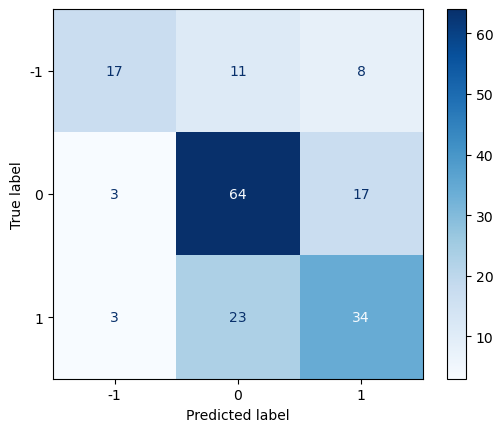

In [13]:
preds = gs.predict(X_test)
cm = confusion_matrix(y_test, preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gs.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.show()

In [14]:
tn, fp, fn, tp = cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]
acc = (tp + tn)/ (tp+tn+fp+fn)
print('Accuracy:', acc)

Accuracy: 0.8526315789473684


In [15]:
spec = tn / (tn + fp)
print('Specificity:', spec)

Specificity: 0.6071428571428571


### Naive Bayes model with TfidfVectorizer

In [16]:
pipe_tvec = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

pipe_tvec_params = {
    'tvec__max_features': [2_000, 3_000, 4_000, 5_000],
    'tvec__stop_words': [None, 'english'],
    'tvec__ngram_range': [(1,1), (1,2)]
}

gs_tvec = GridSearchCV(pipe_tvec,
                        param_grid = pipe_tvec_params, 
                        cv=5) 

gs_tvec.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'tvec__max_features': [2000, 3000, 4000, 5000],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': [None, 'english']})

In [17]:
print(gs_tvec.best_score_)

0.6642857142857143


In [18]:
gs_tvec.score(X_train, y_train)

0.9095238095238095

In [19]:
gs_tvec.score(X_test, y_test)

0.5555555555555556

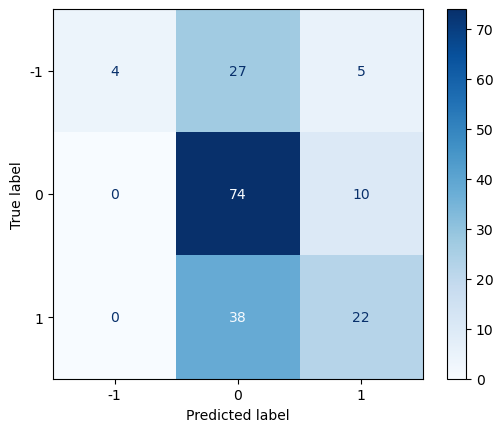

In [20]:
preds_tvec = gs_tvec.predict(X_test)
cm = confusion_matrix(y_test, preds_tvec)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gs_tvec.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.show()

In [21]:
tn, fp, fn, tp = cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]
acc = (tp + tn)/ (tp+tn+fp+fn)
print('Accuracy:', acc)

Accuracy: 0.7428571428571429


In [22]:
spec = tn / (tn + fp)
print('Specificity:', spec)

Specificity: 0.12903225806451613


### Random Forest model with CountVectorizer

In [23]:
rf_pipe = Pipeline([
    ('count_vectorizer', CountVectorizer()),
    ('rf', RandomForestClassifier())
])

rf_params = {
    'count_vectorizer__max_features': [2000, 3000],
    'count_vectorizer__min_df': [1, 2],
    'count_vectorizer__max_df': [0.7, 0.8],
    'count_vectorizer__ngram_range': [(1, 1), (1, 2)],
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 5, 10]
}


rf_rs = RandomizedSearchCV(rf_pipe, param_distributions=rf_params, cv=5, n_iter=10, n_jobs=-1)
rf_rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('count_vectorizer',
                                              CountVectorizer()),
                                             ('rf', RandomForestClassifier())]),
                   n_jobs=-1,
                   param_distributions={'count_vectorizer__max_df': [0.7, 0.8],
                                        'count_vectorizer__max_features': [2000,
                                                                           3000],
                                        'count_vectorizer__min_df': [1, 2],
                                        'count_vectorizer__ngram_range': [(1,
                                                                           1),
                                                                          (1,
                                                                           2)],
                                        'rf__max_depth': [None, 5, 10],
                                        'rf__n_estimators': [100, 200]})

In [24]:
print(rf_rs.best_score_)

0.6904761904761905


In [25]:
rf_rs.score(X_train, y_train)

1.0

In [26]:
rf_rs.score(X_test, y_test)

0.6555555555555556

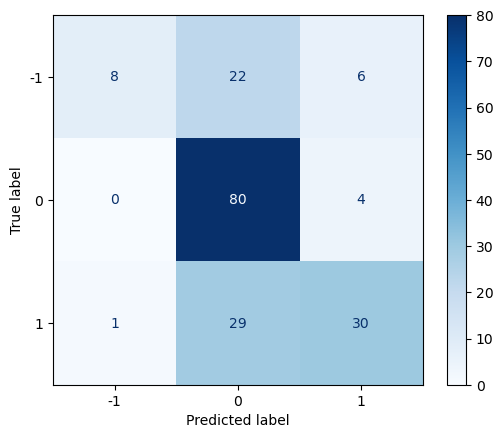

In [27]:
preds_rf = rf_rs.predict(X_test)
cm = confusion_matrix(y_test, preds_rf)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_rs.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.show()

In [28]:
tn, fp, fn, tp = cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]
acc = (tp + tn)/ (tp+tn+fp+fn)
print('Accuracy:', acc)

Accuracy: 0.8


In [29]:
spec = tn / (tn + fp)
print('Specificity:', spec)

Specificity: 0.26666666666666666


### Random Forest model with TfidfVectorizer


In [30]:
rf_pipe = Pipeline([
    ('tfidf_vectorizer', TfidfVectorizer()),
    ('rf', RandomForestClassifier())
])

rf_params = {
    'tfidf_vectorizer__max_features': [2000, 3000],
    'tfidf_vectorizer__min_df': [1, 2],
    'tfidf_vectorizer__max_df': [0.7, 0.8],
    'tfidf_vectorizer__ngram_range': [(1, 1), (1, 2)],
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 5, 10]
}

rf_rs = RandomizedSearchCV(rf_pipe, param_distributions=rf_params, cv=5, n_iter=10, n_jobs=-1)
rf_rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('tfidf_vectorizer',
                                              TfidfVectorizer()),
                                             ('rf', RandomForestClassifier())]),
                   n_jobs=-1,
                   param_distributions={'rf__max_depth': [None, 5, 10],
                                        'rf__n_estimators': [100, 200],
                                        'tfidf_vectorizer__max_df': [0.7, 0.8],
                                        'tfidf_vectorizer__max_features': [2000,
                                                                           3000],
                                        'tfidf_vectorizer__min_df': [1, 2],
                                        'tfidf_vectorizer__ngram_range': [(1,
                                                                           1),
                                                                          (1,
                                                                           2)]})

In [31]:
rf_rs.best_score_

0.6904761904761905

In [32]:
rf_rs.score(X_train, y_train)

1.0

In [33]:
rf_rs.score(X_test, y_test)

0.6666666666666666

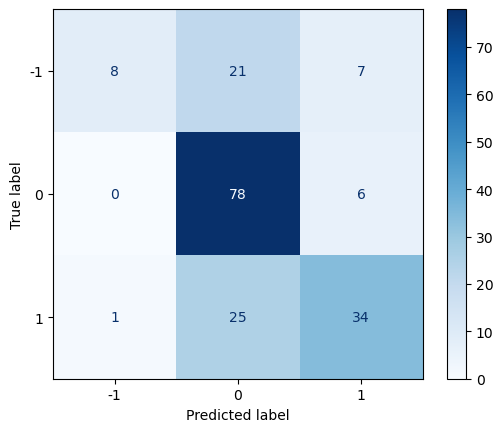

In [34]:
preds_rf = rf_rs.predict(X_test)
cm = confusion_matrix(y_test, preds_rf)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_rs.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.show()

In [35]:
tn, fp, fn, tp = cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]
acc = (tp + tn)/ (tp+tn+fp+fn)
print('Accuracy:', acc)

Accuracy: 0.8037383177570093


In [36]:
spec = tn / (tn + fp)
print('Specificity:', spec)

Specificity: 0.27586206896551724


### Comparison of model performances


|**Model**|**NB-Cvec**|**NB-Tvec**|**RF-Cvec**|**RF-Tvec**|
|-------------------|-------------------|-------------------|-------------------|-------------------|
|Best score|0.693|0.664|0.690|0.690|
|Train score|0.993|0.910|1.000|1.000|
|Test score|0.639|0.556|0.656|0.667|
|Accuracy|0.853|0.743|0.800|0.803|
|Specificity|0.607|0.129|0.266|0.276|

Baseline = 0.466667
We have set the baseline model with count, aim to be better than 0.4667 to beat the baseline model

Comparing the performance of two different machine learning models, a Naive Bayes (NB) model and a Random Forest (RF) model, with different feature extraction techniques, CountVectorizer (Cvec) and TF-IDF Vectorizer (Tvec).

Each model is evaluated based on several metrics: Best Score, Train Score, Test Score and Specificity. comparing with baseline model.

Based on these scores, the Naive Bayes with CountVectorizer seems to be the better model. It has the highest 'Best score' (0.693), which means it performed the best during cross-validation. 

Although the train score sligthly lower than the Random Forest model's 'Train score. However, this high score in RF model might indicate overfitting in the RF model. 

Moreover, the specificity score of Naive Bayes model with countVectorizer is th e highest among all models, suggested that it might perform well in indentifying negative instances.

With these reason, the Random Forest model with CountVectorizer (RF-Cvec) should be the most effective in predicting the sentiment of the news headlines.